# Comparación de resultados

Archivo                                                      |       HV |       GD |      IGD
------------------------------------------------------------------------------------------
poblacion_final_NSGA-III_100_50_20250726_102735.pkl          |   0.4735 |   0.0017 |   0.0132
poblacion_final_NSGA-III_100_50_20250726_104302.pkl          |   0.4761 |   0.0013 |   0.0144
poblacion_final_NSGA-III_100_50_20250726_105823.pkl          |   0.4760 |   0.0009 |   0.0134
poblacion_final_NSGA-III_100_50_20250726_111329.pkl          |   0.4764 |   0.0010 |   0.0129
poblacion_final_NSGA-III_100_50_20250726_112853.pkl          |   0.4785 |   0.0005 |   0.0133
poblacion_final_NSGA-III_100_50_20250726_114429.pkl          |   0.4732 |   0.0016 |   0.0132
poblacion_final_NSGA-III_100_50_20250726_115905.pkl          |   0.4756 |   0.0019 |   0.0140
poblacion_final_NSGA-III_100_50_20250726_121350.pkl          |   0.4774 |   0.0011 |   0.0130
poblacion_final_NSGA-III_100_50_20250726_122918.pkl          | 

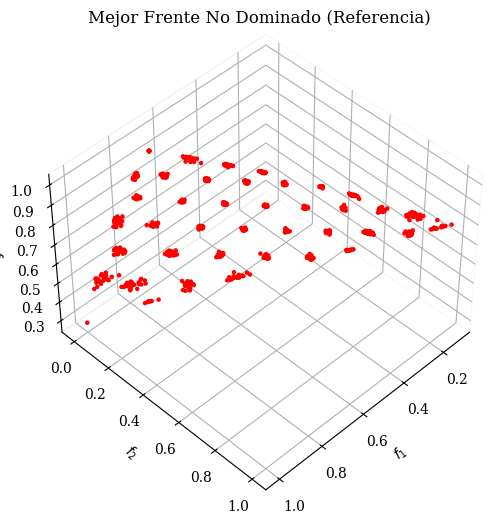

In [28]:
import os
import pickle
import numpy as np
from pymoo.indicators.hv import Hypervolume
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.visualization.scatter import Scatter

# --- Configuración ---
DIRECTORIO = "./modificacion2"  # directorio actual
EXTENSION = ".pkl"
n_obj = 3

# Leer todos los archivos .pkl del directorio
archivos = [f for f in os.listdir(DIRECTORIO) if f.endswith(EXTENSION)]

fitness_dict = {}
for archivo in archivos:
    with open(os.path.join(DIRECTORIO, archivo), "rb") as f:
        data = pickle.load(f)
        if isinstance(data, dict) and "fitnessF" in data:
            fitness_dict[archivo] = np.array(data["fitnessF"])

# Unir todos los frentes para obtener el mejor frente no dominado global
todos_fitness = np.vstack(list(fitness_dict.values()))

# Obtener frontera de referencia no dominada
nds = NonDominatedSorting()
nd_idx = nds.do(todos_fitness, only_non_dominated_front=True)
frontera_referencia = todos_fitness[nd_idx]

# Calcular punto de referencia para HV
ref_point = np.zeros(n_obj)

# --- Cálculo de métricas ---
print(f"{'Archivo':<60} | {'HV':>8} | {'GD':>8} | {'IGD':>8}")
print("-" * 90)

hv_vals = []
gd_vals = []
igd_vals = []

for nombre, fitness in fitness_dict.items():
    hv = Hypervolume(ref_point=ref_point).do(fitness)
    gd = GD(frontera_referencia).do(fitness)
    igd = IGD(frontera_referencia).do(fitness)

    hv_vals.append(hv)
    gd_vals.append(gd)
    igd_vals.append(igd)

    print(f"{nombre:<60} | {hv:8.4f} | {gd:8.4f} | {igd:8.4f}")

# --- Resultados estadísticos ---
print("-" * 90)
print(f"{'PROMEDIO':<60} | {np.mean(hv_vals):8.4f} | {np.mean(gd_vals):8.4f} | {np.mean(igd_vals):8.4f}")
print(f"{'DESV.STD':<60} | {np.std(hv_vals):8.4f} | {np.std(gd_vals):8.4f} | {np.std(igd_vals):8.4f}")

# --- Gráfico del mejor frente no dominado ---
plot = Scatter(title="Mejor Frente No Dominado (Referencia)", s=5)
plot.add(frontera_referencia * -1, label="Mejor frente no dominado", color="red", marker='o', s=5)
plot.show()

if n_obj > 2:
    # Visualización interactiva en 3D usando Plotly
    import plotly.graph_objs as go
    import plotly.offline as pyo

    trace = go.Scatter3d(
        x=frontera_referencia[:, 0] * -1,
        y=frontera_referencia[:, 1] * -1,
        z=frontera_referencia[:, 2] * -1,
        mode='markers',
        marker=dict(size=4, color='red'),
        name='Mejor frente no dominado'
    )

    layout = go.Layout(
        title='Mejor Frente No Dominado (Interactivo)',
        scene=dict(
            xaxis_title='Objetivo 1',
            yaxis_title='Objetivo 2',
            zaxis_title='Objetivo 3'
        )
    )

    fig = go.Figure(data=[trace], layout=layout)
    pyo.iplot(fig)
